In [4]:
import pandas as pd
import numpy as np
import re

In [177]:
#Leer el archivo parquet trf 
#path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/trf_lote_es.parquet'
#df_preprocesado = pd.read_parquet(path)

In [173]:
#Leer el archivo parquet trf preprocesado
#path = '/export/usuarios_ml4ds/lbartolome/NextProcurement/data/all_processed/trf_lote_es.parquet'
#df_preprocesado = pd.read_parquet(path)

In [19]:
#Leer el archivo parquet trf preprocesado
path = '/export/usuarios_ml4ds/lbartolome/NextProcurement/data/processed_10_abr/trf_lote_es.parquet'
df_preprocesado = pd.read_parquet(path)

In [174]:
df_preprocesado

,id_tm,raw_text,lemmas
identifier,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,Redacción EPIA - Legalización antena emisora d...,epia legalización antena emisora_radio narcea
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/494,5,Diversos materiales para el acondicionamiento ...,rotonda arriat decoracion jardinera maceta via...
...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa


In [20]:
#Es donde está el CPV
path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/processed/minors_insiders_outsiders.parquet'
df_con_lote = pd.read_parquet(path)

In [21]:
# Comprobación de NaN usando isna()
na_mask = df_preprocesado['lemmas'].isna()

# Comprobación de la cadena 'nan' (considerando tanto minúsculas como mayúsculas)
nan_string_mask = df_preprocesado['lemmas'].str.lower() == 'nan'

# Comprobación de cadenas vacías
empty_string_mask = df_preprocesado['lemmas'] == ''

# Combinar las máscaras para obtener una única columna que indique si alguna condición se cumple
issues_mask = na_mask | nan_string_mask | empty_string_mask

# Agregar la máscara como una nueva columna al DataFrame para visualizar fácilmente
df_preprocesado['Has Issues'] = issues_mask

# Mostrar las filas que tienen problemas (es decir, True en la columna 'Has Issues')
problematic_rows = df_preprocesado[df_preprocesado['Has Issues']]

print(problematic_rows)

                                                      id_tm  \
identifier                                                    
contratosMenoresPerfilesContratantes_2018.zip/c...      173   
contratosMenoresPerfilesContratantes_2018.zip/c...      343   
contratosMenoresPerfilesContratantes_2018.zip/c...      500   
contratosMenoresPerfilesContratantes_2018.zip/c...      531   
contratosMenoresPerfilesContratantes_2018.zip/c...     1071   
...                                                     ...   
PlataformasAgregadasSinMenores_202401.zip/Plata...  3106972   
PlataformasAgregadasSinMenores_202401.zip/Plata...  3107799   
PlataformasAgregadasSinMenores_202401.zip/Plata...  3108329   
PlataformasAgregadasSinMenores_202401.zip/Plata...  3108689   
PlataformasAgregadasSinMenores_202401.zip/Plata...  3109721   

                                                                                             raw_text  \
identifier                                                                 

In [22]:
problematic_rows

,id_tm,raw_text,lemmas,Has Issues
identifier,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/326,173,Mantenimiento edificios Cádiz,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/156,343,Mantenimiento centro de transformación,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_11.atom/499,500,Adquisición diverso material de oficina,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_11.atom/468,531,Adquisición de material de oficina.,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_10.atom/427,1071,Servicios de investigación,,True
...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240126_040017.atom/323,3106972,Acuerdo marco para el suministro de material g...,,True
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240127_040109.atom/284,3107799,Asistencia técnica innovación territorial,,True
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240130_040032.atom/463,3108329,Servicios de asistencia técnica para las obras...,,True


In [23]:
#total
path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/minors_insiders_outsiders.parquet'
df_total = pd.read_parquet(path)

In [24]:
df_total

,id_tm,title,summary,lot_name,text,origin,CPV,lang
identifier,,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/0,0,Actuacion de desmontado de cubierta de placas ...,Id licitación: 2.18/32619.5069/01; Órgano de C...,nan,Actuacion de desmontado de cubierta de placas ...,minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/10,1,Servicio de mantenimiento de una puerta girato...,Id licitación: 37/CM-02/19; Órgano de Contrata...,nan,Servicio de mantenimiento de una puerta girato...,minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/101,2,Servivios tecnologia GESTIONA: suscripcion man...,Id licitación: FTRA-0254/2018; Órgano de Contr...,nan,Servivios tecnologia GESTIONA: suscripcion man...,minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/107,3,"Suministro de equipos de sobremesa, portátiles...",Id licitación: 18.115.GS999.AI.01; Órgano de C...,nan,"Suministro de equipos de sobremesa, portátiles...",minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/108,4,Realización de backup remoto en las oficinas d...,Id licitación: 18.114.GS999.AI.01; Órgano de C...,nan,Realización de backup remoto en las oficinas d...,minors,[nan],es
...,...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95,3360668,servicio de punto de encuentro familiar en la ...,Id licitación: CONTR 2023 0000927905; Órgano d...,nan,servicio de punto de encuentro familiar en la ...,outsiders,"[[85311300, 75231100]]",es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/96/1,3360669,0001181/2023 contr 2023 1204117 servicio de ma...,Id licitación: +6.65MUHQ7; Órgano de contratac...,Mantenimiento y reparación de sistemas para pr...,0001181/2023 contr 2023 1204117 servicio de ma...,outsiders,None,es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/97,3360670,renting vehiculo 5 plazas para el delegado t. ...,Id licitación: CONTR 2023 0001053296; Órgano d...,nan,renting vehiculo 5 plazas para el delegado t. ...,outsiders,[34100000.0],es


In [25]:
df_merge = pd.merge(df_total,problematic_rows, how='right', on='identifier')    

In [26]:
df_merge

,id_tm_x,title,summary,lot_name,text,origin,CPV,lang,id_tm_y,raw_text,lemmas,Has Issues
identifier,,,,,,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/326,2466.0,Mantenimiento edificios Cádiz,Id licitación: 17110117500; Órgano de Contrata...,nan,Mantenimiento edificios Cádiz. Id licitación: ...,minors,[nan],es,173,Mantenimiento edificios Cádiz,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/156,2275.0,Mantenimiento centro de transformación,Id licitación: 320/17; Órgano de Contratación:...,nan,Mantenimiento centro de transformación . Id li...,minors,[nan],es,343,Mantenimiento centro de transformación,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_11.atom/499,2155.0,Adquisición diverso material de oficina,Id licitación: 40-17/CM07/10; Órgano de Contra...,nan,Adquisición diverso material de oficina. Id li...,minors,[nan],es,500,Adquisición diverso material de oficina,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_11.atom/468,2121.0,Adquisición de material de oficina.,Id licitación: LE-2017/45 CM SU; Órgano de Con...,nan,Adquisición de material de oficina.. Id licita...,minors,[nan],es,531,Adquisición de material de oficina.,,True
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_10.atom/427,1576.0,Servicios de investigación,Id licitación: 286/17; Órgano de Contratación:...,nan,Servicios de investigación . Id licitación: 28...,minors,[nan],es,1071,Servicios de investigación,,True
...,...,...,...,...,...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240126_040017.atom/323,3356195.0,Acuerdo marco para el suministro de material g...,Id licitación: 6012100210;Órgano de Contrataci...,nan,Acuerdo marco para el suministro de material g...,outsiders,"[[79820000, 79810000, 22900000, 22100000, 1952...",es,3106972,Acuerdo marco para el suministro de material g...,,True
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240127_040109.atom/284,3357620.0,Asistencia técnica innovación territorial,Id licitación: 3290_5-2023; Órgano de Contrata...,nan,Asistencia técnica innovación territorial. Id ...,outsiders,[73200000.0],es,3107799,Asistencia técnica innovación territorial,,True
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240130_040032.atom/463,3358712.0,Servicios de asistencia técnica para las obras...,Id licitación: 172-2023;Órgano de Contratación...,nan,Servicios de asistencia técnica para las obras...,outsiders,"[[71311100, 71310000]]",es,3108329,Servicios de asistencia técnica para las obras...,,True


In [27]:
es_unico = df_preprocesado.index.is_unique
print(es_unico)

True


In [28]:
df_con_lote

,id_tm,title,summary,lot_name,text,origin,CPV,lang
identifier,,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/0,0,Actuacion de desmontado de cubierta de placas ...,Id licitación: 2.18/32619.5069/01; Órgano de C...,nan,Actuacion de desmontado de cubierta de placas ...,minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/10,1,Servicio de mantenimiento de una puerta girato...,Id licitación: 37/CM-02/19; Órgano de Contrata...,nan,Servicio de mantenimiento de una puerta girato...,minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/101,2,Servivios tecnologia GESTIONA: suscripcion man...,Id licitación: FTRA-0254/2018; Órgano de Contr...,nan,Servivios tecnologia GESTIONA: suscripcion man...,minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/107,3,"Suministro de equipos de sobremesa, portátiles...",Id licitación: 18.115.GS999.AI.01; Órgano de C...,nan,"Suministro de equipos de sobremesa, portátiles...",minors,[nan],es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/108,4,Realización de backup remoto en las oficinas d...,Id licitación: 18.114.GS999.AI.01; Órgano de C...,nan,Realización de backup remoto en las oficinas d...,minors,[nan],es
...,...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95,3360668,servicio de punto de encuentro familiar en la ...,Id licitación: CONTR 2023 0000927905; Órgano d...,nan,servicio de punto de encuentro familiar en la ...,outsiders,"[[85311300, 75231100]]",es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/96/1,3360669,0001181/2023 contr 2023 1204117 servicio de ma...,Id licitación: +6.65MUHQ7; Órgano de contratac...,Mantenimiento y reparación de sistemas para pr...,0001181/2023 contr 2023 1204117 servicio de ma...,outsiders,None,es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/97,3360670,renting vehiculo 5 plazas para el delegado t. ...,Id licitación: CONTR 2023 0001053296; Órgano d...,nan,renting vehiculo 5 plazas para el delegado t. ...,outsiders,[34100000.0],es


In [30]:
# Convertir 'nan' a NaN en la columna CPV
df_con_lote['CPV'] = df_con_lote['CPV'].apply(lambda x: np.nan if x == 'nan' else x)
# Filtrar las filas donde la columna CPV no sea NaN
filtered_df = df_con_lote.dropna(subset=['CPV'])

In [31]:
len(df_con_lote)

3360673

In [32]:
#Es el df que tiene códigos CPVs
filtered_df.CPV.iloc[0]

array(['92600000.0'], dtype=object)

In [33]:
fila_filtrada = filtered_df.loc[filtered_df['id_tm'] == 3360668]

In [34]:
fila_filtrada.CPV

identifier
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95    [[85311300, 75231100]]
Name: CPV, dtype: object

In [35]:
def asignar_categoria(cpv, dict_categorias):
    # Comprobar si cpv es una cadena de texto y no está vacía
    if not cpv or pd.isna(cpv):
        return pd.NA
    
    # Separar los CPVs en una lista de números como strings
    cpv_list = cpv.split(', ')
    
    # Lista para almacenar las categorías encontradas para cada CPV
    categorias_encontradas = []
    
    # Iterar sobre cada número de CPV en la lista
    for numero in cpv_list:
        # Encontrar los dos primeros dígitos del CPV
        primeros_dos_digitos = numero[:2]
        
        # Buscar la categoría que coincida con los dos primeros dígitos
        categoria = next((value for key, value in dict_categorias.items() if key.startswith(primeros_dos_digitos)), 'Desconocido')
        
        # Agregar la categoría encontrada a la lista
        categorias_encontradas.append(categoria)
    
    # Unir las categorías con '&'
    return ' & '.join(categorias_encontradas)

def formatear_cpv(cpv_elemento):
    # Convertir el elemento a un string para simplificar el procesamiento
    cpv_str = str(cpv_elemento)

    # Extraer números, considerando posibles decimales
    numeros = re.findall(r'\d+\.\d+|\d+', cpv_str)

    # Unir los números extraídos con comas, formando un string final limpio
    resultado = ', '.join(numeros)

    return resultado

In [36]:
filtered_df['CPV'] = filtered_df['CPV'].apply(formatear_cpv)

/tmp/ipykernel_540156/1436118341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CPV'] = filtered_df['CPV'].apply(formatear_cpv)


In [39]:
type(filtered_df.CPV.iloc[90000])

str

In [37]:
dict_categorias = {
    "03000000-1": "03-Productos de la agricultura, ganadería, pesca, silvicultura y productos afines",
    "09000000-3": "09-Derivados del petróleo, combustibles, electricidad y otras fuentes de energía",
    "14000000-1": "14-Productos de la minería, de metales de base y productos afines",
    "15000000-8": "15-Alimentos, bebidas, tabaco y productos afines",
    "16000000-5": "16-Maquinaria agrícola",
    "18000000-9": "18-Prendas de vestir, calzado, artículos de viaje y accesorios",
    "19000000-6": "19-Piel y textiles, materiales de plástico y caucho",
    "22000000-0": "22-Impresos y productos relacionados",
    "24000000-4": "24-Productos químicos",
    "30000000-9": "30-Máquinas, equipo y artículos de oficina y de informática, excepto mobiliario y paquetes de software",
    "31000000-6": "31-Máquinas, aparatos, equipo y productos consumibles eléctricos; iluminación",
    "32000000-3": "32-Equipos de radio, televisión, comunicaciones y telecomunicaciones y equipos conexos",
    "33000000-0": "33-Equipamiento y artículos médicos, farmacéuticos y de higiene personal",
    "34000000-7": "34-Equipos de transporte y productos auxiliares",
    "35000000-4": "35-Equipo de seguridad, extinción de incendios, policía y defensa",
    "37000000-8": "37-Instrumentos musicales, artículos deportivos, juegos, juguetes, artículos de artesanía, materiales artísticos y accesorios",
    "38000000-5": "38-Equipo de laboratorio, óptico y de precisión (excepto gafas)",
    "39000000-2": "39-Mobiliario (incluido el de oficina), complementos de mobiliario, aparatos electrodomésticos (excluida la iluminación) y productos de limpieza",
    "41000000-9": "41-Agua recogida y depurada",
    "42000000-6": "42-Maquinaria industrial",
    "43000000-3": "43-Maquinaria para la minería y la explotación de canteras y equipo de construcción",
    "44000000-0": "44-Estructuras y materiales de construcción; productos auxiliares para la construcción (excepto aparatos eléctricos)",
    "45000000-7": "45-Trabajos de construcción",
    "48000000-8": "48-Paquetes de software y sistemas de información",
    "50000000-5": "50-Servicios de reparación y mantenimiento",
    "51000000-9": "51-Servicios de instalación (excepto software)",
    "55000000-0": "55-Servicios comerciales al por menor de hostelería y restauración",
    "60000000-8": "60-Servicios de transporte (excluido el transporte de residuos)",
    "63000000-9": "63-Servicios de transporte complementarios y auxiliares; servicios de agencias de viajes",
    "64000000-6": "64-Servicios de correos y telecomunicaciones",
    "65000000-3": "65-Servicios públicos",
    "66000000-0": "66-Servicios financieros y de seguros",
    "70000000-1": "70-Servicios inmobiliarios",
    "71000000-8": "71-Servicios de arquitectura, construcción, ingeniería e inspección",
    "72000000-5": "72-Servicios TI: consultoría, desarrollo de software, Internet y apoyo",
    "73000000-2": "73-Servicios de investigación y desarrollo y servicios de consultoría conexos",
    "75000000-6": "75-Servicios de administración pública, defensa y servicios de seguridad social",
    "76000000-3": "76-Servicios relacionados con la industria del gas y del petróleo",
    "77000000-0": "77-Servicios agrícolas, forestales, hortícolas, acuícolas y apícolas",
    "79000000-4": "79-Servicios a empresas: legislación, mercadotecnia, asesoría, selección de personal, imprenta y seguridad",
    "80000000-4": "80-Servicios de enseñanza y formación",
    "85000000-9": "85-Servicios de salud y asistencia social",
    "90000000-7": "90-Servicios de alcantarillado, basura, limpieza y medio ambiente",
    "92000000-1": "92-Servicios de esparcimiento, culturales y deportivos",
    "98000000-3": "98-Otros servicios comunitarios, sociales o personales"
}

In [38]:
filtered_df['categoria'] = filtered_df['CPV'].apply(lambda cpv: asignar_categoria(cpv, dict_categorias))
#fila_filtrada = filtered_df.loc[filtered_df['id_tm'] == 3360668]

/tmp/ipykernel_540156/3016054305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['categoria'] = filtered_df['CPV'].apply(lambda cpv: asignar_categoria(cpv, dict_categorias))


In [39]:
filtered_df

,id_tm,title,summary,lot_name,text,origin,CPV,lang,categoria
identifier,,,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/116,10,Material de librería,Id licitación: SUM-341-16529/2018; Órgano de C...,nan,Material de librería. Id licitación: SUM-341-1...,minors,92600000.0,es,"92-Servicios de esparcimiento, culturales y de..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/172,40,Suministro de 4.000 pins con el escudo de la C...,Id licitación: 0534/2018; Órgano de Contrataci...,nan,Suministro de 4.000 pins con el escudo de la C...,minors,39293500.0,es,"39-Mobiliario (incluido el de oficina), comple..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/192,53,Mantenimiento de Arcos Quirúrgicos,Id licitación: (A02018349)-2019-M-001; Órgano ...,nan,Mantenimiento de Arcos Quirúrgicos. Id licitac...,minors,50420000.0,es,50-Servicios de reparación y mantenimiento
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/195,54,Suministro de vendas y vendajes para MAZ,Id licitación: 2018/MEN/SUM/1098; Órgano de Co...,nan,Suministro de vendas y vendajes para MAZ. Id l...,minors,33141113.0,es,"33-Equipamiento y artículos médicos, farmacéut..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/205,57,Contrato de mantenimiento de licencias de SAP ...,Id licitación: 1-19; Órgano de Contratación: D...,nan,Contrato de mantenimiento de licencias de SAP ...,minors,72210000.0,es,"72-Servicios TI: consultoría, desarrollo de so..."
...,...,...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/93,3360650,armonizacion de textos consolidados,Id licitación: CONTR 2023 0000503592; Órgano d...,nan,armonizacion de textos consolidados. Id licita...,outsiders,79131000.0,es,"79-Servicios a empresas: legislación, mercadot..."
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95,3360668,servicio de punto de encuentro familiar en la ...,Id licitación: CONTR 2023 0000927905; Órgano d...,nan,servicio de punto de encuentro familiar en la ...,outsiders,"85311300, 75231100",es,85-Servicios de salud y asistencia social & 75...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/97,3360670,renting vehiculo 5 plazas para el delegado t. ...,Id licitación: CONTR 2023 0001053296; Órgano d...,nan,renting vehiculo 5 plazas para el delegado t. ...,outsiders,34100000.0,es,34-Equipos de transporte y productos auxiliares


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
#fila_filtrada['categorias_list']

In [ ]:
# Convertir la columna 'categorias' en una lista de categorías para cada fila
#filtered_df['categorias_list'] = filtered_df['categoria'].str.split(' & ')
# Calcular el número total de categorías únicas en el diccionario
#print(len(dict_categorias))#45

In [76]:
# Función para calcular el porcentaje de categorías representadas
def porcentaje_categorias(lista_categorias):
    # Contar cuántas categorías únicas hay en la lista, ignorando 'Desconocido'
    num_categorias_presentes = len(set(cat for cat in lista_categorias))
    # Calcular el porcentaje que esto representa del total de categorías
    porcentaje = (num_categorias_presentes / len(dict_categorias)) * 100
    return porcentaje

In [43]:
fila_filtrada = filtered_df.loc[filtered_df['id_tm'] == 3360668]

In [53]:
fila_filtrada.CPV.iloc[0]

'85311300, 75231100'

In [72]:
def empieza_prefijo(cpv_cadena, prefijo):
    # Verificar si la entrada no es una cadena, y convertirla a cadena si es necesario
    if not isinstance(cpv_cadena, str):
        cpv_cadena = str(cpv_cadena)

    # Dividir la cadena por comas para obtener una lista de números
    numeros = cpv_cadena.split(',')
    
    return [numero.strip() for numero in numeros if numero.strip().startswith(prefijo)]

In [69]:
df_filtrado = filtered_df[filtered_df['CPV'].apply(lambda x: empieza_prefijo(str(x), '92'))]

In [70]:
len(df_filtrado)

103541

In [64]:
filtered_df

,id_tm,title,summary,lot_name,text,origin,CPV,lang,categoria
identifier,,,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/116,10,Material de librería,Id licitación: SUM-341-16529/2018; Órgano de C...,nan,Material de librería. Id licitación: SUM-341-1...,minors,92600000.0,es,"92-Servicios de esparcimiento, culturales y de..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/172,40,Suministro de 4.000 pins con el escudo de la C...,Id licitación: 0534/2018; Órgano de Contrataci...,nan,Suministro de 4.000 pins con el escudo de la C...,minors,39293500.0,es,"39-Mobiliario (incluido el de oficina), comple..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/192,53,Mantenimiento de Arcos Quirúrgicos,Id licitación: (A02018349)-2019-M-001; Órgano ...,nan,Mantenimiento de Arcos Quirúrgicos. Id licitac...,minors,50420000.0,es,50-Servicios de reparación y mantenimiento
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/195,54,Suministro de vendas y vendajes para MAZ,Id licitación: 2018/MEN/SUM/1098; Órgano de Co...,nan,Suministro de vendas y vendajes para MAZ. Id l...,minors,33141113.0,es,"33-Equipamiento y artículos médicos, farmacéut..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/205,57,Contrato de mantenimiento de licencias de SAP ...,Id licitación: 1-19; Órgano de Contratación: D...,nan,Contrato de mantenimiento de licencias de SAP ...,minors,72210000.0,es,"72-Servicios TI: consultoría, desarrollo de so..."
...,...,...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/93,3360650,armonizacion de textos consolidados,Id licitación: CONTR 2023 0000503592; Órgano d...,nan,armonizacion de textos consolidados. Id licita...,outsiders,79131000.0,es,"79-Servicios a empresas: legislación, mercadot..."
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/95,3360668,servicio de punto de encuentro familiar en la ...,Id licitación: CONTR 2023 0000927905; Órgano d...,nan,servicio de punto de encuentro familiar en la ...,outsiders,"85311300, 75231100",es,85-Servicios de salud y asistencia social & 75...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/97,3360670,renting vehiculo 5 plazas para el delegado t. ...,Id licitación: CONTR 2023 0001053296; Órgano d...,nan,renting vehiculo 5 plazas para el delegado t. ...,outsiders,34100000.0,es,34-Equipos de transporte y productos auxiliares


In [69]:
fila_filtrada = filtered_df.loc[filtered_df['id_tm'] == 3360523]

In [71]:
fila_filtrada.CPV.iloc[0]

'79952100, 79811000, 79342320, 71356300, 71245000, 51313000, 42961100, 32320000, 79950000, 79810000, 79342311, 79342310, 71318100, 51314000, 45112712, 32342410, 31121000'

In [87]:
dff

,id_tm,title,summary,lot_name,text,origin,CPV,lang,categoria
identifier,,,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/274,92,Pequeñas actuaciones preventivas para evitar a...,Id licitación: CTR 2207/18; Órgano de Contrata...,nan,Pequeñas actuaciones preventivas para evitar a...,minors,45320000,es,Trabajos de construcción
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/301,106,Reparación de urgencia en las filtraciones de ...,Id licitación: 2018/001699; Órgano de Contrata...,nan,Reparación de urgencia en las filtraciones de ...,minors,45260000,es,Trabajos de construcción
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/305,108,Obras de mejora de la instalación eléctrica en...,Id licitación: 2018/001641; Órgano de Contrata...,nan,Obras de mejora de la instalación eléctrica en...,minors,45310000,es,Trabajos de construcción
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/370,145,Construcción Depósito para almacenamiento de A...,Id licitación: P/0769/M/18/6; Órgano de Contra...,nan,Construcción Depósito para almacenamiento de A...,minors,"45300000, 45000000, 45200000",es,Trabajos de construcción & Trabajos de constru...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes.atom/371,146,Mejora y Acondicionamiento instalaciones EMUME...,Id licitación: p/0787/M/18/6; Órgano de Contra...,nan,Mejora y Acondicionamiento instalaciones EMUME...,minors,"45000000, 45300000, 45200000",unknown,Trabajos de construcción & Trabajos de constru...
...,...,...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/64,3360618,"L’objecte del present Projecte, consisteix en ...",Id licitación: 23/2024; Órgano de Contratación...,nan,"L’objecte del present Projecte, consisteix en ...",outsiders,45210000,unknown,Trabajos de construcción
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/78,3360633,“Obras de construcción del nuevo edificio judi...,Id licitación: A/OBR-037911/2023;Órgano de Con...,nan,“Obras de construcción del nuevo edificio judi...,outsiders,45210000,es,Trabajos de construcción
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores_20240201_040018_1.atom/8,3360635,proyecto y obra de adecuación y conservación d...,Id licitación: CT320-23-013; Órgano de contrat...,nan,proyecto y obra de adecuación y conservación d...,outsiders,"45000000, 71240000",es,Trabajos de construcción & Servicios de arquit...


In [13]:
ruta_completa = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/completo_CPV.parquet'
# Guardar el DataFrame como archivo Parquet
#filtered_df.to_parquet(ruta_completa)

NameError: name 'filtered_df' is not defined

In [14]:
#Probando el merge que se hace en el train_tm_Carlos.py
df_preprocesado.reset_index(inplace=True)
dataframe = pd.merge(df_preprocesado,filtered_df, how='right', on='identifier')

NameError: name 'filtered_df' is not defined

In [92]:
df_preprocesado.columns

Index(['identifier', 'id_tm', 'raw_text', 'lemmas'], dtype='object')

In [111]:
len(df_preprocesado)

2637237

In [114]:
df_preprocesado_sin_duplicados = df_preprocesado.drop_duplicates(subset='lemmas', keep='first')

In [115]:
len(df_preprocesado_sin_duplicados)

2017057

In [116]:
path1 = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/trf_lote_es_sin_duplicados.parquet'
# Guardar el DataFrame como archivo Parquet
df_preprocesado_sin_duplicados.to_parquet(path1)

In [164]:
dataframe

,identifier,id_tm_x,raw_text,lemmas,id_tm_y,title,summary,lot_name,text,origin,CPV,lang,categoria
0,contratosMenoresPerfilesContratantes_2018.zip/...,159222.0,Material de librería,librería,10,Material de librería,Id licitación: SUM-341-16529/2018; Órgano de C...,nan,Material de librería. Id licitación: SUM-341-1...,minors,92600000.0,es,"Servicios de esparcimiento, culturales y depor..."
1,contratosMenoresPerfilesContratantes_2018.zip/...,159169.0,Suministro de 4.000 pins con el escudo de la C...,pin_escudo ciudad_autónoma troquelado color,40,Suministro de 4.000 pins con el escudo de la C...,Id licitación: 0534/2018; Órgano de Contrataci...,nan,Suministro de 4.000 pins con el escudo de la C...,minors,39293500.0,es,"Mobiliario (incluido el de oficina), complemen..."
2,contratosMenoresPerfilesContratantes_2018.zip/...,159149.0,Mantenimiento de Arcos Quirúrgicos,quirúrgico,53,Mantenimiento de Arcos Quirúrgicos,Id licitación: (A02018349)-2019-M-001; Órgano ...,nan,Mantenimiento de Arcos Quirúrgicos. Id licitac...,minors,50420000.0,es,Servicios de reparación y mantenimiento
3,contratosMenoresPerfilesContratantes_2018.zip/...,159146.0,Suministro de vendas y vendajes para MAZ,venda_vendaje maz,54,Suministro de vendas y vendajes para MAZ,Id licitación: 2018/MEN/SUM/1098; Órgano de Co...,nan,Suministro de vendas y vendajes para MAZ. Id l...,minors,33141113.0,es,"Equipamiento y artículos médicos, farmacéutico..."
4,contratosMenoresPerfilesContratantes_2018.zip/...,159136.0,Contrato de mantenimiento de licencias de SAP ...,sap central,57,Contrato de mantenimiento de licencias de SAP ...,Id licitación: 1-19; Órgano de Contratación: D...,nan,Contrato de mantenimiento de licencias de SAP ...,minors,72210000.0,es,"Servicios TI: consultoría, desarrollo de softw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570206,PlataformasAgregadasSinMenores_202401.zip/Plat...,3109336.0,armonizacion de textos consolidados,armonizacion consolidado,3360650,armonizacion de textos consolidados,Id licitación: CONTR 2023 0000503592; Órgano d...,nan,armonizacion de textos consolidados. Id licita...,outsiders,79131000.0,es,"Servicios a empresas: legislación, mercadotecn..."
1570207,PlataformasAgregadasSinMenores_202401.zip/Plat...,3109334.0,servicio de punto de encuentro familiar en la ...,punto encuentro_familiar provincia,3360668,servicio de punto de encuentro familiar en la ...,Id licitación: CONTR 2023 0000927905; Órgano d...,nan,servicio de punto de encuentro familiar en la ...,outsiders,"85311300, 75231100",es,Servicios de salud y asistencia social & Servi...
1570208,PlataformasAgregadasSinMenores_202401.zip/Plat...,3109332.0,renting vehiculo 5 plazas para el delegado t. ...,renting vehiculo plaza pub,3360670,renting vehiculo 5 plazas para el delegado t. ...,Id licitación: CONTR 2023 0001053296; Órgano d...,nan,renting vehiculo 5 plazas para el delegado t. ...,outsiders,34100000.0,es,Equipos de transporte y productos auxiliares
1570209,PlataformasAgregadasSinMenores_202401.zip/Plat...,3109331.0,Servicio de Asistencia Técnica y Auditorias In...,servicio asistencia_técnica auditorias interna...,3360671,Servicio de Asistencia Técnica y Auditorias In...,Id licitación: 23/084; Órgano de Contratación...,nan,Servicio de Asistencia Técnica y Auditorias In...,outsiders,79212000.0,es,"Servicios a empresas: legislación, mercadotecn..."


In [165]:
# Comprobación de NaN usando isna()
na_mask = dataframe['lemmas'].isna()
# Comprobación de la cadena 'nan' (considerando tanto minúsculas como mayúsculas)
nan_string_mask = dataframe['lemmas'].str.lower() == 'nan'
# Comprobación de cadenas vacías
empty_string_mask = dataframe['lemmas'] == ''

# Combinar las máscaras para obtener una única columna que indique si alguna condición se cumple
issues_mask = na_mask | nan_string_mask | empty_string_mask

# Agregar la máscara como una nueva columna al DataFrame para visualizar fácilmente
dataframe['Has Issues'] = issues_mask

# Mostrar las filas que tienen problemas (es decir, True en la columna 'Has Issues')
problematic_rows = dataframe[dataframe['Has Issues']]

print(problematic_rows)

                                                identifier  id_tm_x raw_text  \
22       contratosMenoresPerfilesContratantes_2018.zip/...      NaN     <NA>   
34       contratosMenoresPerfilesContratantes_2018.zip/...      NaN     <NA>   
54       contratosMenoresPerfilesContratantes_2018.zip/...      NaN     <NA>   
56       contratosMenoresPerfilesContratantes_2018.zip/...      NaN     <NA>   
57       contratosMenoresPerfilesContratantes_2018.zip/...      NaN     <NA>   
...                                                    ...      ...      ...   
1570199  PlataformasAgregadasSinMenores_202401.zip/Plat...      NaN     <NA>   
1570200  PlataformasAgregadasSinMenores_202401.zip/Plat...      NaN     <NA>   
1570201  PlataformasAgregadasSinMenores_202401.zip/Plat...      NaN     <NA>   
1570204  PlataformasAgregadasSinMenores_202401.zip/Plat...      NaN     <NA>   
1570205  PlataformasAgregadasSinMenores_202401.zip/Plat...      NaN     <NA>   

        lemmas  id_tm_y                

In [166]:
problematic_rows

,identifier,id_tm_x,raw_text,lemmas,id_tm_y,title,summary,lot_name,text,origin,CPV,lang,categoria,Has Issues
22,contratosMenoresPerfilesContratantes_2018.zip/...,NaN,<NA>,NaN,114,"FRA. 5. 2 lejia, 2 asevi mio, y 2 amoniaco mar...",Id licitación: F/2018/430; Órgano de Contratac...,nan,"FRA. 5. 2 lejia, 2 asevi mio, y 2 amoniaco mar...",minors,"39830000, 39224300",es,"Mobiliario (incluido el de oficina), complemen...",True
34,contratosMenoresPerfilesContratantes_2018.zip/...,NaN,<NA>,NaN,160,Mantenimiento del ascensor del edificio del an...,Id licitación: 36-2018; Órgano de Contratación...,nan,Mantenimiento del ascensor del edificio del an...,minors,50750000.0,es,Servicios de reparación y mantenimiento,True
54,contratosMenoresPerfilesContratantes_2018.zip/...,NaN,<NA>,NaN,188,Suplencia de l'assessor del Centre de Català d...,Id licitación: 28/2018; Órgano de Contratación...,nan,Suplencia de l'assessor del Centre de Català d...,minors,80400000.0,ca,Servicios de enseñanza y formación,True
56,contratosMenoresPerfilesContratantes_2018.zip/...,NaN,<NA>,NaN,206,Seu de les jornades professionals de FiraB!,Id licitación: 30/2018; Órgano de Contratación...,nan,Seu de les jornades professionals de FiraB!. I...,minors,98000000.0,es,"Otros servicios comunitarios, sociales o perso...",True
57,contratosMenoresPerfilesContratantes_2018.zip/...,NaN,<NA>,NaN,208,Actualització del catàleg BCulture,Id licitación: 33/2018; Órgano de Contratación...,nan,Actualització del catàleg BCulture . Id licita...,minors,92500000.0,ca,"Servicios de esparcimiento, culturales y depor...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570199,PlataformasAgregadasSinMenores_202401.zip/Plat...,NaN,<NA>,NaN,3360643,Serveis d’actualització del pla de comunicació...,Id licitación: 2279/2023; Órgano de Contrataci...,nan,Serveis d’actualització del pla de comunicació...,outsiders,79340000.0,ca,"Servicios a empresas: legislación, mercadotecn...",True
1570200,PlataformasAgregadasSinMenores_202401.zip/Plat...,NaN,<NA>,NaN,3360644,L'objecte d'aquesta contractació consistirà en...,Id licitación: 1438-028/2023; Órgano de Contra...,nan,L'objecte d'aquesta contractació consistirà en...,outsiders,77211500.0,unknown,"Servicios agrícolas, forestales, hortícolas, a...",True
1570201,PlataformasAgregadasSinMenores_202401.zip/Plat...,NaN,<NA>,NaN,3360645,Contractació del subministrament de 14 carros ...,Id licitación: CSMS 15/23-S; Órgano de Contrat...,nan,Contractació del subministrament de 14 carros ...,outsiders,34911100.0,ca,Equipos de transporte y productos auxiliares,True
1570204,PlataformasAgregadasSinMenores_202401.zip/Plat...,NaN,<NA>,NaN,3360648,Subministrament arrendament i servei de manten...,Id licitación: 2023_22 CON X2023001177; Órgano...,nan,Subministrament arrendament i servei de manten...,outsiders,42912300.0,ca,Maquinaria industrial,True


In [159]:
'''
# Vectorizar el proceso de eliminación de stopwords
def eliminar_stopwords(fila):
    return ' '.join([palabra for palabra in fila.split() if palabra not in stopwords])
data = {
    'lemmas': [
        "El rápido zorro marrón",
        "La inteligencia artificial",
        "Hola caligraf",
        "Python davelco",
        "Los bricor autónomos ciudades"
    ]
}
# Convertir el diccionario en un DataFrame
processed = pd.DataFrame(data)

import os

path_manual_stops = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords_sin_duplicados'
#Probando la eliminación de stopwords
stopwords = set()
for archivo in os.listdir(path_manual_stops):
    if archivo.endswith('.txt'):
        ruta_completa = os.path.join(path_manual_stops, archivo)
        with open(ruta_completa, 'r', encoding='utf-8') as f:
            stopwords.update(f.read().splitlines())
            
# Aplicar la función de processed vectorizada
processed['lemmas'] = processed['lemmas'].apply(eliminar_stopwords)
print(processed)
'''

In [89]:
print(df_preprocesado.columns)

Index(['id_tm', 'raw_text', 'lemmas'], dtype='object')


In [96]:
#Eliminar entradas con mismo título para evitar meter ruido al modelo
#Se limpiar para lote o sin lote, esto no afecta a que pueda haber duplicados
path_con_lote = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/minors_insiders_outsiders_origen_con_lot_info.parquet'
path_sin_lote = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/minors_insiders_outsiders_origen_sin_lot_info.parquet'
# Guardar el DataFrame como archivo Parquet
df_con_lote = pd.read_parquet(path_con_lote)
df_sin_lote = pd.read_parquet(path_sin_lote)

In [97]:
df_con_lote

,id_tm,title,summary,lot_name,text,origin,lang
identifier,,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,Id licitación: 000103/2017-1069; Órgano de Con...,nan,Reforma de elementos de ventilación exterior d...,minors,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,Id licitación: 29-2017-II; Órgano de Contratac...,nan,Servicios de calibrado y certificado de dos de...,minors,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",Id licitación: 013-07-2018; Órgano de Contrata...,nan,"Patrocinio menor proyecto "" Activitats C.I.N.E...",minors,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,Redacción EPIA - Legalización antena emisora d...,Id licitación: CON/2017/51; Órgano de Contrata...,nan,Redacción EPIA - Legalización antena emisora d...,minors,es
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,Id licitación: 000047/2017-1069; Órgano de Con...,nan,Obras de reparación del Centro de Información ...,minors,es
...,...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4/9,3360668,concesion de servicios de peluquerías en 10 cp...,Id licitación: CONTR 2023 0000922771; Órgano d...,lote 9 peluquería cpa plaza de los campos,concesion de servicios de peluquerías en 10 cp...,outsiders,es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3360669,Servicios y suministros para la seguridad inte...,Id licitación: CR050-23-087B; Órgano de contra...,nan,Servicios y suministros para la seguridad inte...,outsiders,es
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3360670,Contrato de concesión de servicios para la ges...,Id licitación: CONTR 2023 0001215494; Órgano d...,nan,Contrato de concesión de servicios para la ges...,outsiders,es


In [98]:
df_sin_lote

,id_tm,origen,title,summary,text
identifier,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,minors,Reforma de elementos de ventilación exterior d...,Id licitación: 000103/2017-1069; Órgano de Con...,Reforma de elementos de ventilación exterior d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,minors,Servicios de calibrado y certificado de dos de...,Id licitación: 29-2017-II; Órgano de Contratac...,Servicios de calibrado y certificado de dos de...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,minors,"Patrocinio menor proyecto "" Activitats C.I.N.E""",Id licitación: 013-07-2018; Órgano de Contrata...,"Patrocinio menor proyecto "" Activitats C.I.N.E..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,minors,Redacción EPIA - Legalización antena emisora d...,Id licitación: CON/2017/51; Órgano de Contrata...,Redacción EPIA - Legalización antena emisora d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,minors,Obras de reparación del Centro de Información ...,Id licitación: 000047/2017-1069; Órgano de Con...,Obras de reparación del Centro de Información ...
...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,outsiders,concesion de servicios de peluquerías en 10 cp...,Id licitación: CONTR 2023 0000922771; Órgano d...,concesion de servicios de peluquerías en 10 cp...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,outsiders,Servicios y suministros para la seguridad inte...,Id licitación: CR050-23-087B; Órgano de contra...,Servicios y suministros para la seguridad inte...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,outsiders,Contrato de concesión de servicios para la ges...,Id licitación: CONTR 2023 0001215494; Órgano d...,Contrato de concesión de servicios para la ges...


In [101]:
# Eliminar las filas duplicadas basadas en la columna 'title'
df_sin_lote_sin_duplicados = df_sin_lote.drop_duplicates(subset='title', keep='first')

In [103]:
# Eliminar las filas duplicadas basadas en la columna 'title'
df_con_lote_sin_duplicados = df_con_lote.drop_duplicates(subset='title', keep='first')

In [105]:
print(len(df_con_lote_sin_duplicados))
print(len(df_sin_lote_sin_duplicados))

2744823
2744823


In [107]:
path1 = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/df_sin_lote_sin_duplicados.parquet'
# Guardar el DataFrame como archivo Parquet
df_sin_lote_sin_duplicados.to_parquet(path1)

In [109]:
path1 = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/df_con_lote_sin_duplicados.parquet'
# Guardar el DataFrame como archivo Parquet
df_con_lote_sin_duplicados.to_parquet(path1)

# Gráfica que muestra número de licitaciones por cada categoría superior del CPV

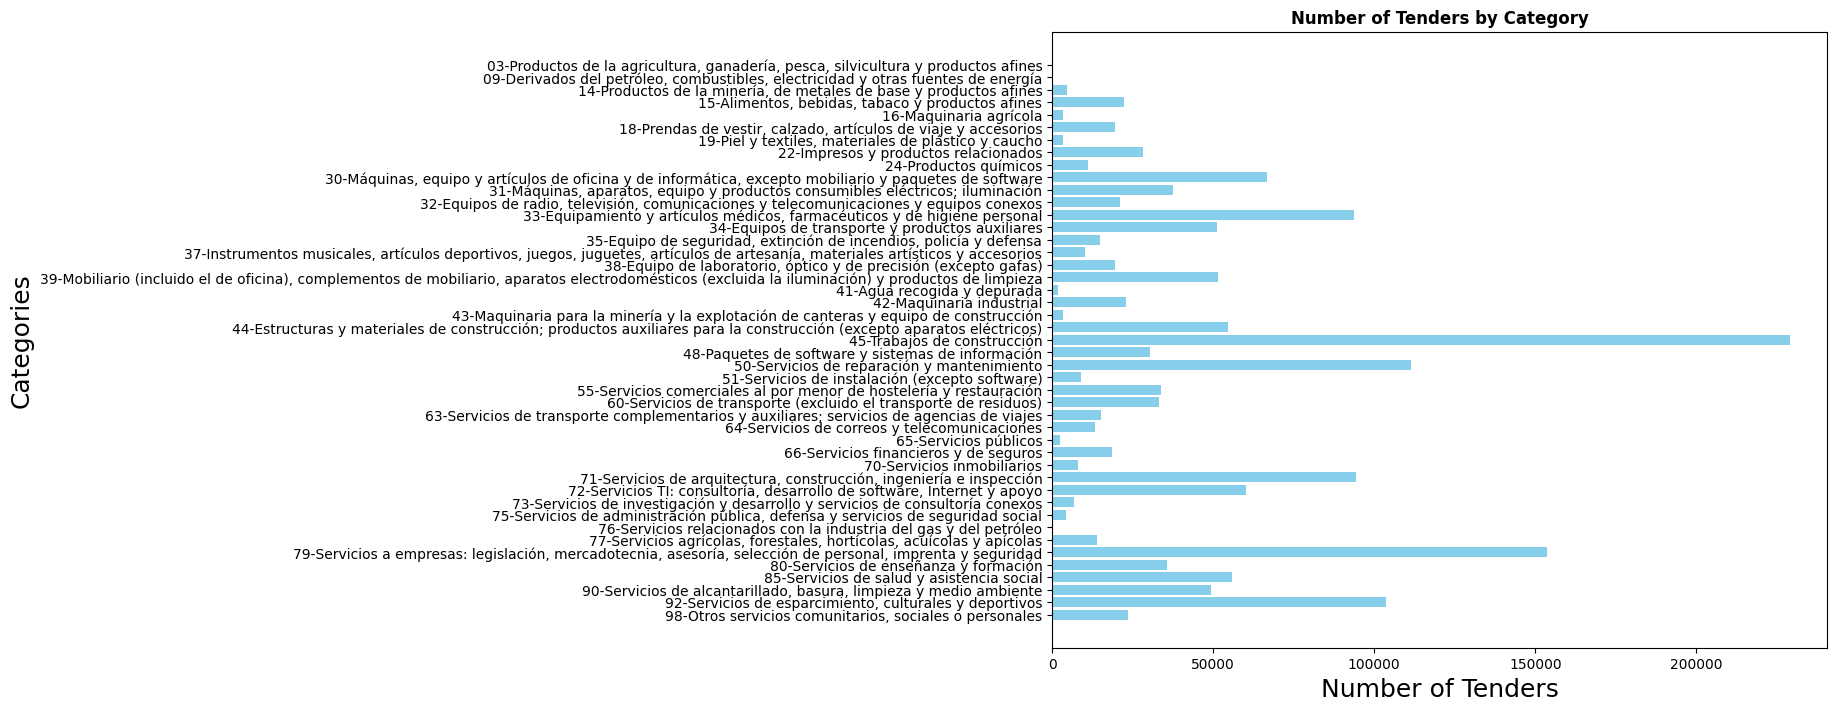

In [77]:
import matplotlib.pyplot as plt

# Usar la nueva función para contar las ocurrencias
contadores = {categoria: 0 for categoria in dict_categorias.values()}
for cpv in filtered_df['CPV']:
    for codigo, categoria in dict_categorias.items():
        if empieza_prefijo(cpv, codigo[:2]):
            contadores[categoria] += 1

# Crear un DataFrame para las visualizaciones
df_contadores = pd.DataFrame(list(contadores.items()), columns=['Categoría', 'Cantidad'])
# Ordenar el DataFrame por el nombre de la categoría
df_contadores = df_contadores.sort_values(by='Categoría', ascending=False)

# Crear el histograma
plt.figure(figsize=(10, 8))
plt.barh(df_contadores['Categoría'], df_contadores['Cantidad'], color='skyblue')
plt.xlabel('Number of Tenders',fontsize=18)
plt.ylabel('Categories', fontsize=18)
plt.title('Number of Tenders by Category', fontweight='bold')
plt.show()